In [1]:
# Preparing graphs
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

%matplotlib inline

l1 = 0.0001
u1 = 3.5
x1 = np.arange(l1, u1, 0.01)
x2 = np.arange(l1, u1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

In [2]:
def utl3(x1, x2, a, b):
    return (x1**a)/a + (x2**b)/b

def MRS3(x1, x2, a, b):
    return (x1**(a-1))/(x2**(b-1))

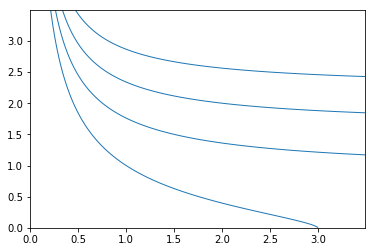

In [10]:
V3 = utl3(X1, X2, -1, 1.5)
plt.figure()
x = np.arange(1, 3, 0.5)
plt.contour(X1, X2, V3, levels = utl3(x, x, -1, 1.5), linewidths = 1, colors = 'C0', linestyles='solid')

In [11]:
def FOC_max(x):
    # parameters are passed like as global variables
    val = np.empty((2)) # We need to specify 'val' as an array, but not a list.
    val[0] = (x[0]**(a-1))/ (x[1]**(b-1)) - slp
    val[1] = IoverPy -  slp*x[0] - x[1]
    return val

In [14]:
a = -1
slp = 1
b = 1

res = fsolve(FOC_min, np.array([float(1),float(1)] )) 
# The initial value must be a np.arrray, not a list. 
# Without making the initial value as a floating point number,
# you will see an error message related to a power in the function 
res

array([ 1. ,  0.2])

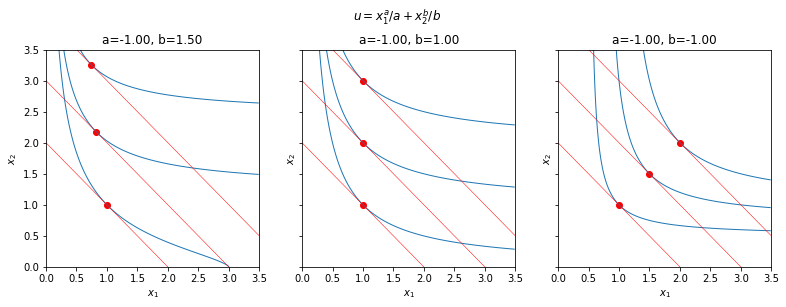

In [16]:
a = -1
slp = 1
bs = [1.5, 1, -1]


fig, axes = plt.subplots(1,3,figsize=(13, 4),
                         sharex= True, #sharing x axis properties such as xlim, xticks
                         sharey= True) #sharing y axis 
plt.suptitle(r'$u=x_1^a/a + x_2^b/b$', va = 'baseline')
for b, ax in zip(bs, axes):
    plt.sca(ax)
    plt.xlim(0,3.5)
    plt.ylim(0,3.5)
    V3 = utl3(X1, X2, -1, b)
    
    x_lev1 = [] #This will be used to adjust contour levels
    x_lev2 = [] #This will be used to adjust contour levels
    for IoverPy in [2,3,4]:
        # Calculate the tangent point
        x_tan = fsolve(FOC_max, np.array([float(1),float(1)] )) 
        plt.scatter(x_tan[0],x_tan[1], color = 'red')
        # Draw the budget line around the tangent point
        tempx = np.arange(x_tan[0]-3, x_tan[0] + 3, 0.01)
        tempy = -slp*tempx + x_tan[1] + x_tan[0]*slp
        plt.plot(tempx, tempy, linestyle = 'solid', linewidth = 0.5,color = 'r')
        # Save tangent points to use them later
        x_lev1.append(x_tan[0])
        x_lev2.append(x_tan[1])
    
    # Until now, x_lev1 is just a list, which looks like a vector or a matrix but cannot be used like as a vector in Matlab.
    # We need to make it to array, to use it like as a vector in Matlab
    x_lev1 = np.array(x_lev1)
    x_lev2 = np.array(x_lev2)
    plt.contour(X1, X2, V3, levels = utl3(x_lev1, x_lev2, -1, b), linewidths = 1, colors = 'C0', linestyles='solid')
    #plt.scatter(x_lev1,x_lev2, color = 'red')
    plt.title(r'a={:02.2f}'.format(a) + r', b={:02.2f}'.format(b))
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
fig.savefig('inferior_and_normal_goods.png')      

In [4]:
def FOC_min(x):
    val = np.empty((2))
    val[0] = (x[0]**(a-1))/ (x[1]**(b-1)) - slp
    val[1] = (x[0]**a)/a + (x[1]**b)/b - u_bar
    return val


a = -1
b = 1.5
slp = 0.7

x_Tans = []
for x_temp in x:
    u_bar = utl3(x_temp, x_temp, -1, 1.5)
    FOC_min(np.array([float(1),float(1)] ))
    res = fsolve(FOC_min, np.array([float(1),float(1)] ))
    x_Tans.append(res)


In [5]:
x_Tans

[array([ 1.27596223,  0.76993248]),
 array([ 1.04209031,  1.73054339]),
 array([ 0.96392261,  2.36393348]),
 array([ 0.9142158 ,  2.92152108])]

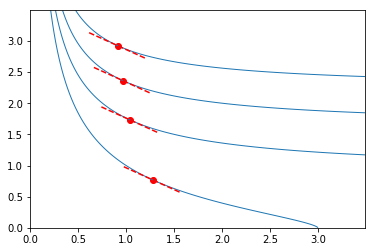

In [6]:
V3 = utl3(X1, X2, -1, 1.5)

plt.figure()
x = np.arange(1, 3, 0.5)
plt.contour(X1, X2, V3, levels = utl3(x, x, -1, 1.5), linewidths = 1, colors = 'C0', linestyles='solid')
for x_tan in x_Tans:
    plt.scatter(x_tan[0],x_tan[1], color = 'red')
    tempx = np.arange(x_tan[0]-0.3, x_tan[0] + 0.3, 0.01)
    tempy = -slp*tempx + x_tan[1] + x_tan[0]*slp
    plt.plot(tempx, tempy, linestyle = 'dashed', color = 'r')